## Principal Components

- Widely used feature extraction method for analysis and visualization
- Orthonormal basis functions 
- Require good data engineering as a precursor to their use

In [214]:


# Data processing and functions
import pandas as pd
import numpy as np
import scipy as sp

# Analytics and modeling
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import manifold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import statsmodels.sandbox.tools.tools_pca as sm_pca
from statsmodels.formula.api import ols as sm_ols
from statsmodels.stats.anova import anova_lm as sm_anova
from patsy.contrasts import Treatment
from patsy import dmatrices

# Graphing and visualizing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from pylab import savefig

# Setting graphing preferences
sns.set(style="darkgrid", color_codes=True)

# Printing
import locale

# Show plots locally
locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

### In-Class Exercise 1
### Community Crime Data: Load the data


- Load the community crime data: CommunityCrimeDataRaw.txt
- The data do not have a header row, this is in a separate file: CrimeVariableLabels.txt
- Read crime.description.txt to determine the missing value character

## In-Class Exercise 2  - Data Cleaning

- Remove the non-predictor/response variables (see 
http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized )

- Remove variables with more that 1k missing values
- Impute the remainder of the missing values

### In-Class Exercise 3 - Predictor and Response Variables

- Determine which variables are predictors and which are responses
- Further clean the response variables
- Graph the SPM and correlation heat map of the response variables
- Min-Max scale the response variables between 0 and 100.
- Min-Max scale the predictors between 0 and 100 (do this only for non percentage predictors)



### In-Class Exercise 4 - Principal Component Analysis on the Response Variables

- Obtain the principal components for the response variables
- Plot the loadings on the first two principal components
- Plot the observations in the first two principal components
- Overlay towns with more than one murder on the first two principal components

In [347]:
############
## perform PCA on the response variables

n = len(response_scaled_df.columns)

pca = PCA(n_components = n)
# default is the number of columns in the data 
# but can be set to any integer less than or equal to that value

crimes_response_pca = pca.fit_transform(response_scaled_df)

# Percentage of variance explained by the first two components

percent_explained = pca.explained_variance_ratio_[:2].sum()*100

print('Percent of explained variance (first two components): %0.0f'
      % percent_explained)


crimes_response_pca.shape


Percent of explained variance (first two components): 71


(2215, 10)

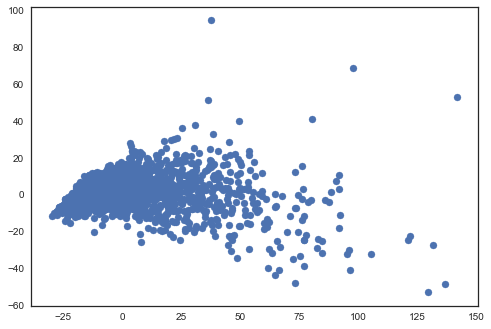

In [348]:
# # PCA scatter plot

plt.scatter(crimes_response_pca[:,0],crimes_response_pca[:,1])




In [350]:
# Towns/communities with > 0 reported murders.

murder_towns = crimes_df.murdPerPop > 0


array([ -2.62600679,   3.58414072,  -0.90823048, ...,  14.06192443,
        -3.05785791,  29.31399195])

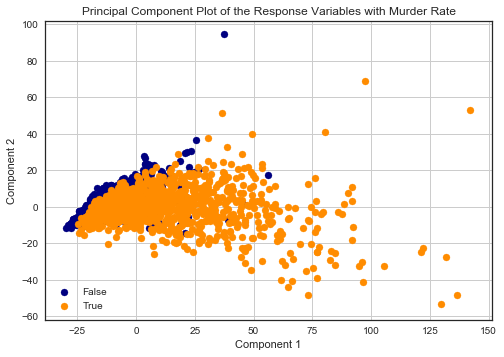

In [352]:
# PCA plot with labels for murder towns
colors = ['navy', 'darkorange']

fig, ax = plt.subplots()
for i, color in  zip([False, True], colors):
        ax.scatter(crimes_response_pca[murder_towns == i, 0],
                   crimes_response_pca[murder_towns == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Response Variables with Murder Rate')


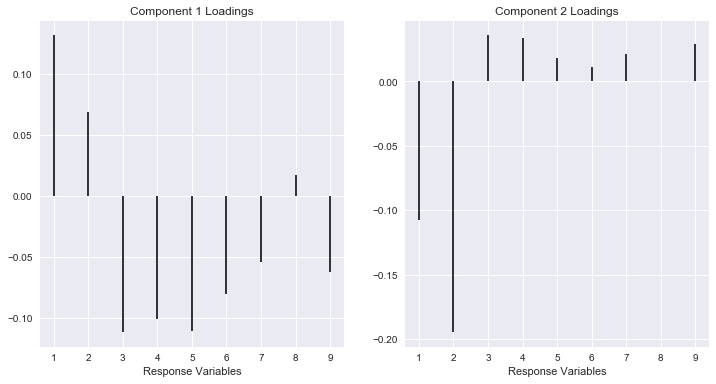

In [335]:
# PCA loadings
# Response Variables PCA

fig = plt.figure(figsize=(12, 6))
Comp1 = fig.add_subplot(121)
Comp2 = fig.add_subplot(122)

Comp1.vlines(range(1,len(crimes_response_df.columns)), [0],pca.components_[1,:])
Comp1.set_xlabel('Response Variables')
Comp1.set_title('Component 1 Loadings')

Comp2.vlines(range(1,len(crimes_response_df.columns)), [0],pca.components_[2,:])
Comp2.set_xlabel('Response Variables')
Comp2.set_title('Component 2 Loadings')


In [ ]:
# # The biplot like the one in R
# # This will take a while to run

# ## project data into PC space
# first 2 PC

pca = PCA(n_components=2)
crimes_response_pca = pca.fit_transform(response_scaled_df)
# # 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = crimes_response_pca[:,0] # see 'prcomp(my_data)$x' in R
ys = crimes_response_pca[:,1]

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(response_scaled_df.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project observations (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2,
             list(response_scaled_df.index)[i], color='b')



### In-Class Exercise 4 - Principal Component Analysis on the Predictor Variables

- Obtain the principal components for the predictor variables
- Plot the loadings on the first two principal components
- Plot the observations in the first two principal components
- Overlay towns with more than one murder on the first two principal components
- Overlay the violent crime rate binned using the box plot statistics
- Overlay the non-violent crime rate binned using the box plot statistics
- Overlay at least one other crime rate binned using the box plot statistics

Here are is an example:

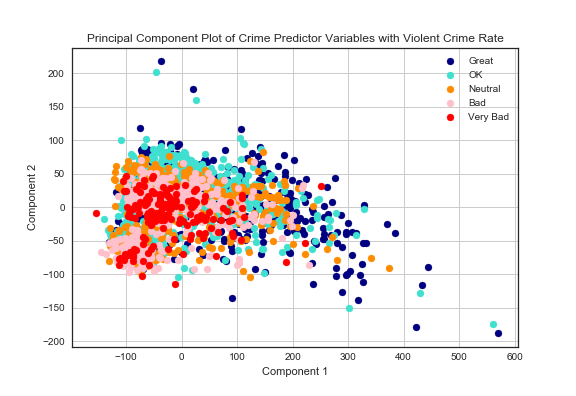


### In-Class Exercise 5 - Principal Component Analysis on the Log Transformation of the Predictor Variables

- Obtain the principal components for the log transformation of the predictor variables
- Plot the loadings on the first two principal components
- Plot the observations in the first two principal components
- Overlay towns with more than one murder on the first two principal components
- Overlay the violent crime rate binned using the box plot statistics
- Overlay the non-violent crime rate binned using the box plot statistics
- Overlay at least one other crime rate binned using the box plot statistics

Here are is an example:

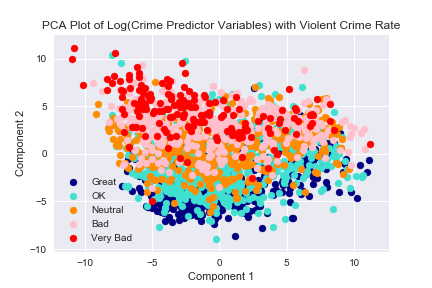